# Surface Data and Plotting


In [1]:
from datetime import datetime, timedelta
from io import StringIO
from urllib.request import urlopen

from metpy.io import metar
from metpy.plots import declarative
from metpy.units import units
import pandas as pd

### Read Data

We bring in surface data that is in METAR format and store it for approximately two weeks in `/data/ldmdata/surface/sao` and the format of the filenames are `YYYYMMDDHH_sao.wmo` where `YYYY` is the year, `MM` is the month, `DD` is the day, and `HH` is the hour. Or there are pre-decoded files located in `/data/ldmdata/surface/csv` and can be read in using the Pandas module.

In [12]:
date = datetime(2022, 1, 31, 18)

# Download current data from http://bergeron.valpo.edu/current_surface_data and upload
# to your Jupyterhub space.
data = StringIO(urlopen('http://bergeron.valpo.edu/current_surface_data/'
                        f'{date:%Y%m%d%H}_sao.wmo').read().decode('utf-8', 'backslashreplace'))
df = metar.parse_metar_file(data, year=date.year, month=date.month)
# Read with pandas, note differences from METAR files
# df = pd.read_csv(f'http://bergeron.valpo.edu/archive_surface_data/{date:%Y}/{date:%Y%m%d}_metar.csv',
#                  parse_dates=['date_time'], na_values=[-9999], low_memory=False)

df['tmpf'] = (df.air_temperature.values * units.degC).to('degF')
df['dwpf'] = (df.dew_point_temperature.values * units.degC).to('degF')

### Plot Data

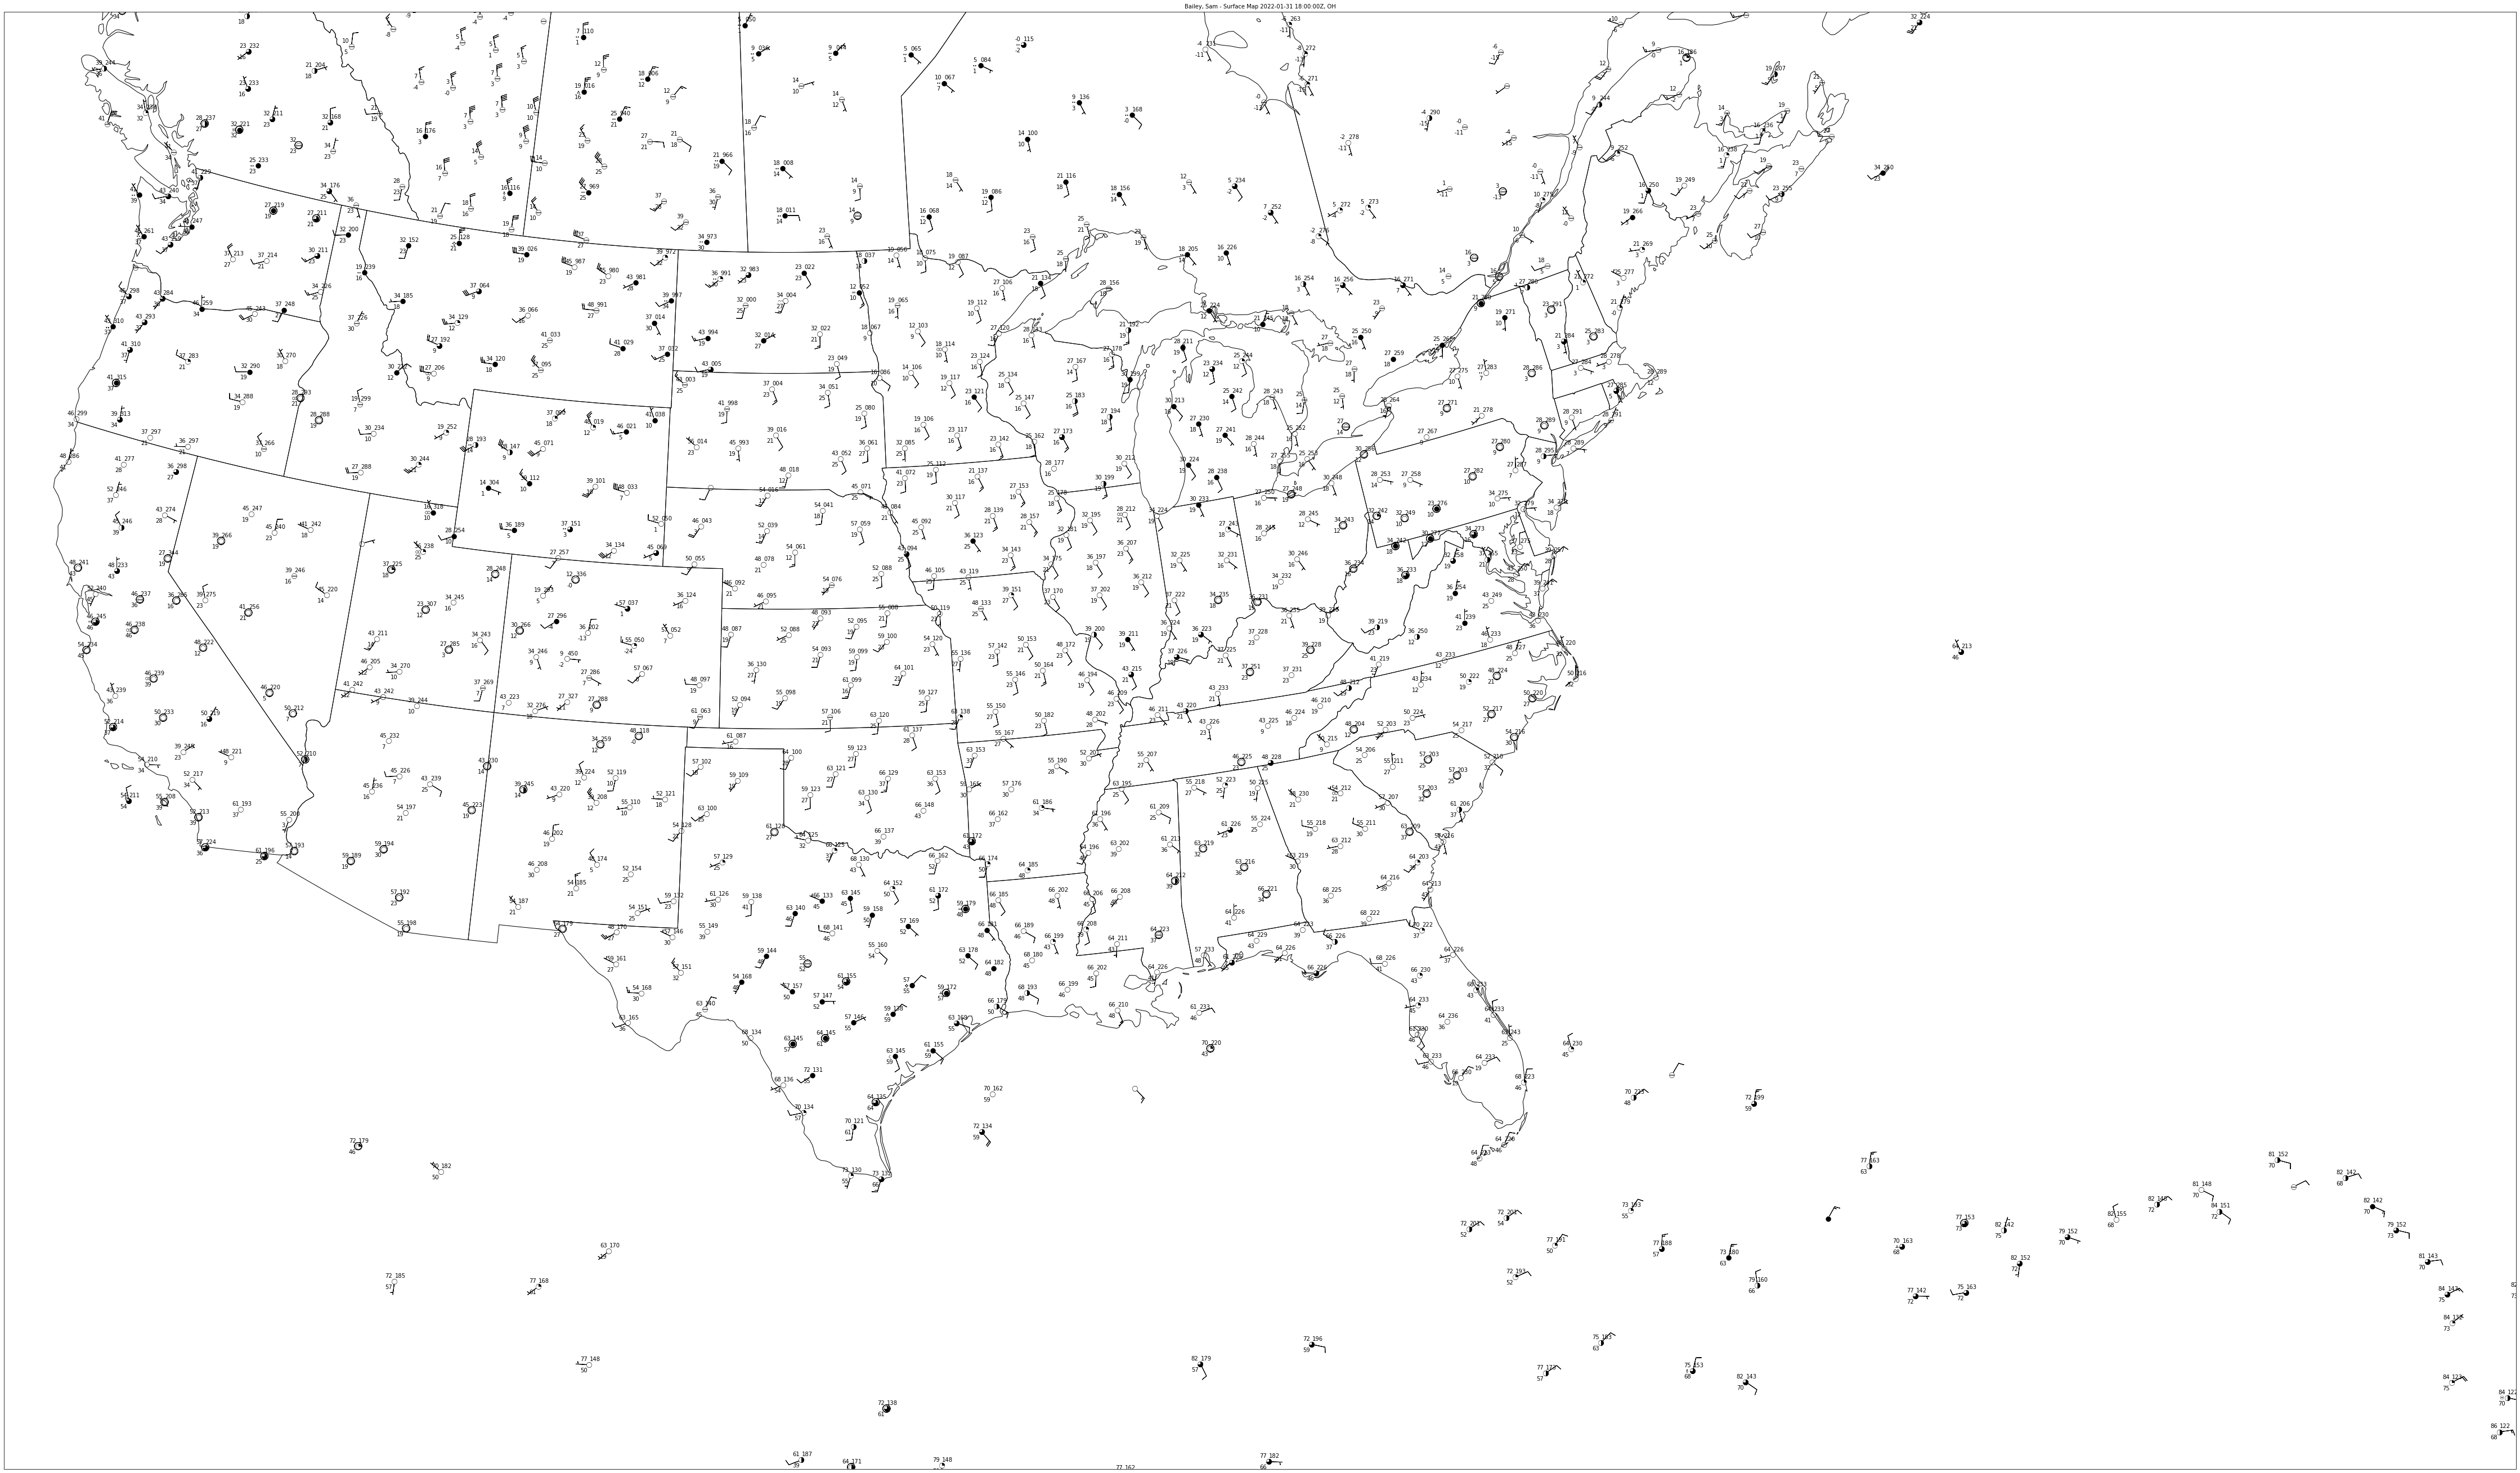

In [16]:
mslp_formatter = lambda v: format(v*10, '.0f')[-3:]

# Plot desired data
obs = declarative.PlotObs()
obs.data = df
obs.time = date
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['cloud_coverage', 'tmpf', 'dwpf',
              'air_pressure_at_sea_level', 'current_wx1_symbol'] # Archive data still stored as 'present_weather', but is now stored as 'current_wx1_symbol' in MetPy.
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.formats = ['sky_cover', None, None, mslp_formatter, 'current_weather']
obs.reduce_points = 0.75
obs.vector_field = ['eastward_wind', 'northward_wind']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'lcc'
panel.area = 'us'
panel.layers = ['states']
panel.plots = [obs]
panel.title = f'Bailey, Sam - Surface Map {obs.time}Z, OH'

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (80, 80)
pc.panels = [panel]

pc.show()

In [18]:
pc.save(f'Maps/{obs.time}Z, US, 200 DPI - Bailey, Sam.png', dpi=200, bbox_inches='tight')

In [11]:
df.keys()

Index(['station_id', 'latitude', 'longitude', 'elevation', 'date_time',
       'wind_direction', 'wind_speed', 'wind_gust', 'visibility',
       'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type',
       'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level',
       'high_cloud_type', 'high_cloud_level', 'highest_cloud_type',
       'highest_cloud_level', 'cloud_coverage', 'air_temperature',
       'dew_point_temperature', 'altimeter', 'current_wx1_symbol',
       'current_wx2_symbol', 'current_wx3_symbol', 'remarks',
       'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind', 'tmpf',
       'dwpf'],
      dtype='object')